# Deep Learning and semantic segmentation

1.   Élément de liste
2.   Élément de liste



Welcome to my new deep learning tutorial!
**In this notebook, you will**:
- Learn to perform semantic segmentation with a Deep Neural Network DNN
- See that the DNN's prediction are not reliable
- Try to robustify your DNN's predictions
If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you already know how to use PyTorch, you can go directly to the second part of this tutorial.

## II. PyTorch Tutorial for regression

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you already know how to use PyTorch, you can go directly to the second part of this tutorial.


## III. Training a Deep Neural Network for semantic segmentation

In this part, we will train a Deep Neural Network to perform semantic segmentation.

## IV. Analyzing the results and working on the uncertainty

In this part, we will test your  Deep Neural Network and see if the results are ok



# I. PyTorch Tutorial
First let us build a start by descovering PyTorch.
Let us start by importing the library.


In [1]:
import torch
import numpy as np


We are now going to build our first Tensors.
In Pytorch everything is based on tensors, while in Numpy it is base on  arrays. There are similarities, but it is not the same thing!

In [2]:
# different way to build a tensor
x = torch.empty( 5, 3 )
print( 'empty', x )
print( x.size() ) # by doing x.size() can see the shape of tensor x
x = torch.rand( 5, 3 )
print( 'random', x )
x = torch.zeros( 5, 3, dtype=torch.long ) # you build a tensor with just zeros
print( 'zeros', x )
x = torch.tensor( [5.5, 3] ) # you build a tensor from an list
print( 'tensor', x )
x = torch.ones( 10, 3 ) # you build a tensor with just ones
print( 'ones', x )
# override dtype!
x = torch.randn_like( x, dtype=torch.float )
print( x )


empty tensor([[6.4476e-15, 4.5771e-41, 6.4476e-15],
        [4.5771e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
torch.Size([5, 3])
random tensor([[0.5691, 0.8736, 0.4438],
        [0.2716, 0.1186, 0.2127],
        [0.4136, 0.0305, 0.3351],
        [0.9342, 0.3624, 0.0869],
        [0.0167, 0.0265, 0.9866]])
zeros tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor tensor([5.5000, 3.0000])
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-7.8270e-01, -5.7133e-01, -4.7833e-01],
        [-5.0633e-01, -8.1668e-01,  5.3949e-01],
        [-1.1469e+00,  9.4936e-01, -8.5564e-01],
        [ 1.4817e-01,  9.2206e-01,  3.8884e-01],
        [ 

Now let us play with operations between tensors

In [3]:
y = torch.rand( 5, 3 )
x = torch.ones( 5, 3 )
z = x + y
print( z )


tensor([[1.4318, 1.6434, 1.3693],
        [1.9192, 1.8585, 1.6575],
        [1.5796, 1.9504, 1.5051],
        [1.4388, 1.4974, 1.2227],
        [1.8357, 1.7609, 1.5826]])


In [4]:
# here is 3 different ways to change the shape of x
print( x )
x0 = x.view( ( 3, 5 ) )
print( 'original shape of x', x.size(), 'new shape', x0.size() )

x1 = x.view( -1 )
print( 'original shape of x', x.size(), 'new shape', x1.size() )

x2 = x.transpose( 0, 1 )
print( 'original shape of x', x.size(), 'new shape', x2.size() )

x3 = x.reshape( ( 3, 5 ) )
print( 'original shape of x', x.size(), 'new shape', x3.size() )


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([15])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])


From Pytorch to Numpy


In [5]:
x = torch.randn( 4, 4 )
print( 'the type of x is :', type(x) )
xnumpy = x.numpy()
print( 'the type of xnumpy is :', type( xnumpy ) )


the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>


In [6]:
x2 = torch.tensor( [1.0] )
print( 'the type of x is :', type( x2 ) )
x2numpy = x2.numpy()
print( 'the type of xnumpy is :', type( x2numpy ) )
x2numpy = x2.item()
print( 'the type of xnumpy is :', type( x2numpy ) )


the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>
the type of xnumpy is : <class 'float'>


**Q1/ why the next command do not work?**



In [7]:
# y = xnumpy + x

---

**Answer:**

This command doesn't work because it is impossible to add a matrix and a tensor.

---


**Q2/ Please find a way to bring a = np.ones(5) to the GPU?**

In [8]:
a = np.ones( 5 )
a_torch = torch.from_numpy( a )
a_cuda = a_torch.cuda()

print( a )
print( a_torch )
print( a_cuda )


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)


# II. Training a FCN for semantic segmentation




---



---


Now let us perform a semantic segmentation DNN. We will first build a datasetloader and then train the DNN.


In [9]:
# here are the training parameters
batch_size = 10
learning_rate = 1e-3
weight_decay = 2e-4
lr_decay_epochs = 20
lr_decay = 0.1
nb_epochs = 50


Please download the dataset and put it in your google cloud  here is the link https://drive.google.com/drive/folders/1HBj97T5aO-NoAEnUy_GfaS1fK5Epf0W2?usp=sharing

## A. building the dataset
Please note that we set as background the car, the bicyclist and pedestrian. So the CNN never see these classes.

In [10]:
import os

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from PIL import Image

from google.colab import drive


In [11]:
# First you download the camvid dataset from the link (wwwww ) and you put it in your google colab
# Then let us mount you google drive
drive.mount( '/drive' )


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


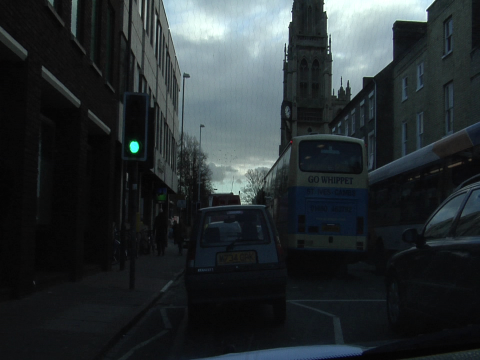

In [12]:
# Please check that you can read an image  from camvid dataset
PATH_data = '/drive/MyDrive/ROB313/CamVid'

im = Image.open( PATH_data + "/train/0001TP_006690.png" )
im


 here is a set of utils function for the dataset and the evaluation

In [13]:
import os

from collections import OrderedDict
import torch.utils.data as data
import numpy as np
from torchvision.transforms import ToPILImage
import torchvision.models as models


def get_files( folder, name_filter=None, extension_filter=None ):
    """Helper function that returns the list of files in a specified folder
    with a specified extension.

    Keyword arguments:
    - folder (``string``): The path to a folder.
    - name_filter (```string``, optional): The returned files must contain
    this substring in their filename. Default: None; files are not filtered.
    - extension_filter (``string``, optional): The desired file extension.
    Default: None; files are not filtered

    """
    if not os.path.isdir( folder ):
        raise RuntimeError( "\"{0}\" is not a folder.".format( folder ) )

    # Filename filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files that do not
    # contain "name_filter"
    if name_filter is None:
        # This looks hackish...there is probably a better way
        name_cond = lambda filename: True
    else:
        name_cond = lambda filename: name_filter in filename

    # Extension filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files whose extension
    # is not "extension_filter"
    if extension_filter is None:
        # This looks hackish...there is probably a better way
        ext_cond = lambda filename: True
    else:
        ext_cond = lambda filename: filename.endswith( extension_filter )

    filtered_files = []

    # Explore the directory tree to get files that contain "name_filter" and
    # with extension "extension_filter"
    for path, _, files in os.walk( folder ):
        files.sort()
        for file in files:
            if name_cond( file ) and ext_cond( file ):
                full_path = os.path.join( path, file )
                filtered_files.append( full_path )

    return filtered_files


def pil_loader( data_path, label_path ):
    """Loads a sample and label image given their path as PIL images.

    Keyword arguments:
    - data_path (``string``): The filepath to the image.
    - label_path (``string``): The filepath to the ground-truth image.

    Returns the image and the label as PIL images.

    """
    data = Image.open( data_path )
    label = Image.open( label_path )

    return data, label


def batch_transform( batch, transform ):
    """Applies a transform to a batch of samples.

    Keyword arguments:
    - batch (): a batch os samples
    - transform (callable): A function/transform to apply to ``batch``

    """

    # Convert the single channel label to RGB in tensor form
    # 1. torch.unbind removes the 0-dimension of "labels" and returns a tuple of
    # all slices along that dimension
    # 2. the transform is applied to each slice
    transf_slices = [transform( tensor ) for tensor in torch.unbind( batch )]

    return torch.stack( transf_slices )


def remap( image, old_values, new_values ):
    assert isinstance( image, Image.Image ) or \
      isinstance( image, np.ndarray ), \
      "image must be of type PIL.Image or numpy.ndarray"
    assert type( new_values ) is tuple, "new_values must be of type tuple"
    assert type( old_values ) is tuple, "old_values must be of type tuple"
    assert len( new_values ) == len( old_values ), \
      "new_values and old_values must have the same length"

    # If image is a PIL.Image convert it to a numpy array
    if isinstance( image, Image.Image ):
        image = np.array( image )

    # Replace old values by the new ones
    tmp = np.zeros_like( image )
    for old, new in zip( old_values, new_values ):
        # Since tmp is already initialized as zeros we can skip new values
        # equal to 0
        if new != 0:
            tmp[image == old] = new

    return Image.fromarray( tmp )


def enet_weighing( dataloader, num_classes, c=1.02 ):
    """Computes class weights as described in the ENet paper:

        w_class = 1 / (ln(c + p_class)),

    where c is usually 1.02 and p_class is the propensity score of that
    class:

        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """

    print( dataloader )
    class_count = 0
    total = 0
    for _, label in dataloader:
      label = label.cpu().numpy()
      # Flatten label
      flat_label = label.flatten()
      
      # Sum up the number of pixels of each class and the total pixel
      # counts for each label
      class_count += np.bincount( flat_label, minlength=num_classes )
      total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / ( np.log( c + propensity_score ) )

    return class_weights


class PILToLongTensor( object ):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.
    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor
    """

    def __call__( self, pic ):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.
        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``
        Returns:
        A ``torch.LongTensor``.
        """
        if not isinstance( pic, Image.Image ):
            raise TypeError( \
              "pic should be PIL Image. Got {}" .format( type( pic ) ) )

        # handle numpy array
        if isinstance( pic, np.ndarray ):
            img = torch.from_numpy( pic.transpose( ( 2, 0, 1 ) ) )
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor( torch.ByteStorage.from_buffer( pic.tobytes() ) )

        # Reshape tensor
        nchannel = len( pic.mode )
        img = img.view( pic.size[1], pic.size[0], nchannel )

        # Convert to long and squeeze the channels
        return img.transpose( 0, 1 ).transpose( 0,2 ).\
          contiguous().long().squeeze_()


class LongTensorToRGBPIL( object ):
    """Converts a ``torch.LongTensor`` to a ``PIL image``.
    The input is a ``torch.LongTensor`` where each pixel's value identifies the
    class.
    Keyword arguments:
    - rgb_encoding (``OrderedDict``): An ``OrderedDict`` that relates pixel
    values, class names, and class colors.
    """
    def __init__( self, rgb_encoding ):
        self.rgb_encoding = rgb_encoding

    def __call__( self, tensor ):
        """Performs the conversion from ``torch.LongTensor`` to a ``PIL image``
        Keyword arguments:
        - tensor (``torch.LongTensor``): the tensor to convert
        Returns:
        A ``PIL.Image``.
        """
        # Check if label_tensor is a LongTensor
        if not isinstance( tensor, torch.LongTensor ):
            raise TypeError( "label_tensor should be torch.LongTensor. Got {}" \
              .format( type( tensor ) ) )
        # Check if encoding is a ordered dictionary
        if not isinstance( self.rgb_encoding, OrderedDict ):
            raise TypeError( "encoding should be an OrderedDict. Got {}" \
              .format( type( self.rgb_encoding ) ) )

        # label_tensor might be an image without a channel dimension, in this
        # case unsqueeze it
        if len( tensor.size() ) == 2:
            tensor.unsqueeze_( 0 )

        color_tensor = torch.ByteTensor( 3, tensor.size( 1 ), tensor.size( 2 ) )

        for index, ( class_name, color) \
          in enumerate( self.rgb_encoding.items() ):
            # Get a mask of elements equal to index
            mask = torch.eq( tensor, index ).squeeze_()
            # Fill color_tensor with corresponding colors
            for channel, color_value in enumerate( color ):
                color_tensor[channel].masked_fill_( mask, color_value )

        return ToPILImage()( color_tensor )


## B building the Datalaoder

**Q2bis/ please study the dataset a bit. What it is about?**

---

**Answer:**

This dataset contains several sets of road traffic images taken from a moving car at regular intervals.

---


In [14]:
class CamVid( data.Dataset ):
    """CamVid dataset loader where the dataset is arranged as in
    https://github.com/alexgkendall/SegNet-Tutorial/tree/master/CamVid.


    Keyword arguments:
    - root_dir (``string``): Root directory path.
    - mode (``string``): The type of dataset: 'train' for training set, 'val'
    for validation set, and 'test' for test set.
    - transform (``callable``, optional): A function/transform that  takes in
    an PIL image and returns a transformed version. Default: None.
    - label_transform (``callable``, optional): A function/transform that takes
    in the target and transforms it. Default: None.
    - loader (``callable``, optional): A function to load an image given its
    path. By default ``default_loader`` is used.

    """
    # Training dataset root folders
    train_folder = 'train'
    train_lbl_folder = 'trainannot'

    # Validation dataset root folders
    val_folder = 'val'
    val_lbl_folder = 'valannot'

    # Test dataset root folders
    test_folder = 'test'
    test_lbl_folder = 'testannot'

    # Images extension
    img_extension = '.png'

    # Default encoding for pixel value, class name, and class color
    color_encoding = OrderedDict( [
        ( 'sky', ( 128, 128, 128 ) ),
        ( 'building', ( 128, 0, 0 ) ),
        ( 'pole', ( 192, 192, 128 ) ),
        ( 'road_marking', ( 255, 69, 0 ) ),
        ( 'road', ( 128, 64, 128 ) ),
        ( 'pavement', ( 60, 40, 222 ) ),
        ( 'tree', ( 128, 128, 0 ) ),
        ( 'sign_symbol', ( 192, 128, 128 ) ),
        ( 'fence', ( 64, 64, 128 ) ),
        ( 'car', ( 64, 0, 128 ) ),
        ( 'pedestrian', ( 64, 64, 0 ) ),
        ( 'bicyclist', ( 0, 128, 192 ) ),
        ( 'unlabeled', ( 0, 0, 0 ) )
    ] )


    def __init__( self, root_dir, mode='train', transform=None, \
      label_transform=None, loader=pil_loader ):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.label_transform = label_transform
        self.loader = loader

        if self.mode.lower() == 'train':
            # Get the training data and labels filepaths
            self.train_data = get_files( \
              os.path.join( root_dir, self.train_folder ), \
              extension_filter=self.img_extension )

            self.train_labels = get_files( \
              os.path.join( root_dir, self.train_lbl_folder ),
              extension_filter=self.img_extension )

        elif self.mode.lower() == 'val':
            # Get the validation data and labels filepaths
            self.val_data = get_files( \
              os.path.join( root_dir, self.val_folder ), \
              extension_filter=self.img_extension )

            self.val_labels = get_files( \
              os.path.join( root_dir, self.val_lbl_folder ), \
              extension_filter=self.img_extension )

        elif self.mode.lower() == 'test':
            # Get the test data and labels filepaths
            self.test_data = get_files( \
              os.path.join( root_dir, self.test_folder ), \
              extension_filter=self.img_extension )

            self.test_labels = get_files( \
              os.path.join( root_dir, self.test_lbl_folder ), \
              extension_filter=self.img_extension )

        else:
            raise RuntimeError( "Unexpected dataset mode. " \
              "Supported modes are: train, val and test" )


    def __getitem__( self, index ):
        """
        Args:
        - index (``int``): index of the item in the dataset

        Returns:
        A tuple of ``PIL.Image`` (image, label) where label is the ground-truth
        of the image.

        """
        if self.mode.lower() == 'train':
            data_path, label_path = \
              self.train_data[index], self.train_labels[index]
        elif self.mode.lower() == 'val':
            data_path, label_path = \
              self.val_data[index], self.val_labels[index]
        elif self.mode.lower() == 'test':
            data_path, label_path = \
              self.test_data[index], self.test_labels[index]
        else:
            raise RuntimeError( "Unexpected dataset mode. " \
              "Supported modes are: train, val and test" )

        img, label = self.loader( data_path, label_path )

        if self.transform is not None:
            img = self.transform( img )

        if self.label_transform is not None:
            label = self.label_transform( label )

        return img, label

    def __len__( self ):
        """Returns the length of the dataset."""
        if self.mode.lower() == 'train':
            return len( self.train_data )
        elif self.mode.lower() == 'val':
            return len( self.val_data )
        elif self.mode.lower() == 'test':
            return len( self.test_data )
        else:
            raise RuntimeError( "Unexpected dataset mode. " \
              "Supported modes are: train, val and test" )


In [15]:
print( "\nLoading dataset...\n" )
print( "Dataset directory:", PATH_data )
#print( "Save directory:", save_dir )

image_transform = transforms.Compose( \
  [transforms.Resize( ( 360, 480 ) ), transforms.ToTensor()] )

label_transform = transforms.Compose( \
  [transforms.Resize( ( 360, 480 ), Image.NEAREST ), PILToLongTensor()] )

image_transform_test = transforms.Compose( \
  [transforms.Resize( ( 360, 480 ) ), transforms.ToTensor()] )

# Get selected dataset
# Load the training set as tensors
train_set = CamVid( PATH_data, transform=image_transform, \
  label_transform=label_transform )

train_loader = data.DataLoader( train_set, batch_size=batch_size, \
  shuffle=True, num_workers=2 )

# Load the validation set as tensors
val_set = CamVid( PATH_data, mode='val', transform=image_transform, \
  label_transform=label_transform )

val_loader = data.DataLoader( val_set, batch_size=batch_size, \
  shuffle=False, num_workers=2 )

# Load the test set as tensors
test_set = CamVid( PATH_data, mode='test', transform=image_transform_test, \
  label_transform=label_transform )

test_loader = data.DataLoader( test_set, batch_size=batch_size, \
  shuffle=False, num_workers=4 )

# Get encoding between pixel valus in label images and RGB colors
class_encoding = train_set.color_encoding
print( 'class_encoding  >>>>>', class_encoding )
# Remove the road_marking class from the CamVid dataset as it's merged
# with the road class
#del class_encoding['road_marking']

# Get number of classes to predict
num_classes = len( class_encoding )

# Print information for debugging
print( "Number of classes to predict:", num_classes )
print( "Train dataset size:", len( train_set ) )
print( "Validation dataset size:", len( val_set ) )

# Get a batch of samples to display

images, labels = next( iter( test_loader ) )
print( "Image size:", images.size() )
print( "Label size:", labels.size() )
print( "Class-color encoding:", class_encoding )


# Get class weights from the selected weighing technique
print( "\nComputing class weights..." )
print( "(this can take a while depending on the dataset size)" )

class_weights = enet_weighing( train_loader, num_classes )

class_weights = torch.from_numpy( class_weights ).float().cuda()
# Set the weight of the unlabeled class to 0

ignore_index = list( class_encoding ).index( 'unlabeled' )
class_weights[ignore_index] = 0

print( "Class weights:", class_weights )



Loading dataset...

Dataset directory: /drive/MyDrive/ROB313/CamVid
class_encoding  >>>>> OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])
Number of classes to predict: 13
Train dataset size: 367
Validation dataset size: 101


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Image size: torch.Size([10, 3, 360, 480])
Label size: torch.Size([10, 360, 480])
Class-color encoding: OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])

Computing class weights...
(this can take a while depending on the dataset size)
Class weights: tensor([ 5.7920,  4.4403, 34.0217,  3.4469, 15.9119,  9.0202, 32.0138, 32.4789,
        13.2071, 38.3877, 44.1345, 17.3064,  0.0000], device='cuda:0')


**Q3/ why do we need to evaluate the class weights?**

---

**Answer:**

We need to evaluate the class weights in order to normalise them. This is beacuse the dataset might be (and is) unbalanced, which would result in a biased neural network if the dataset hadn't been normalised before training.

---


## C. building the DNN

In [16]:
class FCN32s( nn.Module ):
    def __init__( self, pretrained_net, classes ):
        super().__init__()
        self.classes = classes
        #self.pretrained_net = pretrained_net
        self.vgg16 = models.vgg16( pretrained=pretrained_net )
        # print( list( self.vgg16.children() ) ) # for checking
        self.pretrained_net = list( self.vgg16.children() )[0]
        self.relu = nn.ReLU( inplace=True )
        self.deconv1 = nn.ConvTranspose2d( 512, 128, kernel_size=3, stride=2, \
          padding=1, dilation=1, output_padding=1 )
        self.bn1 = nn.BatchNorm2d( 128 )
        self.deconv2 = nn.ConvTranspose2d( 128, 128, kernel_size=3, stride=2, \
          padding=1, dilation=1, output_padding=1 )
        self.bn2 = nn.BatchNorm2d( 128 )
        self.deconv3 = nn.ConvTranspose2d( 128, 64, kernel_size=3, stride=2, \
          padding=1, dilation=1, output_padding=1 )
        self.bn3 = nn.BatchNorm2d( 64 )
        self.deconv4 = nn.ConvTranspose2d( 64, 64, kernel_size=3, stride=2, \
          padding=1, dilation=1, output_padding=1 )
        self.bn4 = nn.BatchNorm2d( 64 )
        self.deconv5 = nn.ConvTranspose2d( 64, 32, kernel_size=3, stride=2, \
          padding=1, dilation=1, output_padding=1 )
        self.bn5 = nn.BatchNorm2d( 32 )
        self.classifier = nn.Conv2d( 32, classes, kernel_size=1 )

    def forward( self, x ):
        ( N, C, H, W ) = x.size()
        x5 = self.pretrained_net( x )  # size =( N, 512, x.H/32, x.W/32 )

        score = self.bn1( self.relu( self.deconv1( x5 ) ) )    # real size size = ( N, 512, x.H/16, x.W/16 )
        score = self.bn2( self.relu( self.deconv2( score ) ) ) # real size size = ( N, 256, x.H/8, x.W/8 )
        score = self.bn3( self.relu( self.deconv3( score ) ) ) # real size size = ( N, 128, x.H/4, x.W/4 )
        score = self.bn4( self.relu( self.deconv4( score ) ) ) # real size size = ( N, 64, x.H/2, x.W/2 )
        score = self.bn5( self.relu( self.deconv5( score ) ) ) # real size size = ( N, 32, x.H, x.W )
        score = self.classifier( score ) #  real size size = ( N, n_class, x.H/1, x.W/1 )
        score =  F.interpolate( score, size=( H, W ), mode='bilinear', \
          align_corners=True ) # I added this last layer to be sure about the final size

        return score  # size = ( N, n_class, x.H/1, x.W/1 )


**Q4/ why do I need to simplify the DNN?**

---

**Answer:**

We need to simplify the neural network to prevent it from overfitting to the training dataset, and incorrectly predicting the test dataset.

---


## D. Utility functions

### Metrics

In [17]:
class Metric( object ):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    """
    def reset( self ) :
        pass

    def add( self ):
        pass

    def value( self ):
        pass


class ConfusionMatrix( Metric ):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    """
    def __init__( self, num_classes, normalized=False ):
        super().__init__()

        self.conf = np.ndarray( ( num_classes, num_classes ), dtype=np.int32 )
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()


    def reset( self ):
        self.conf.fill( 0 )


    def add( self, predicted, target ):
        """Computes the confusion matrix
        The shape of the confusion matrix is K x K, where K is the number
        of classes.
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor( predicted ):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor( target ):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
          'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
              'number of predictions does not match size of confusion matrix'
            predicted = np.argmax( predicted, 1 )
        else:
            assert ( predicted.max() < self.num_classes ) and \
              ( predicted.min() >= 0 ), \
              'predicted values are not between 0 and k-1'

        if np.ndim( target ) != 1:
            assert target.shape[1] == self.num_classes, \
              'Onehot target does not match size of confusion matrix'
            assert ( target >= 0 ).all() and ( target <= 1 ).all(), \
              'in one-hot encoding, target values should be 0 or 1'
            assert ( target.sum( 1 ) == 1 ).all(), \
              'multi-label setting is not supported'
            target = np.argmax( target, 1 )
        else:
            assert ( target.max() < self.num_classes ) and \
              ( target.min() >= 0 ), 'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount( \
          x.astype( np.int32 ), minlength=self.num_classes**2 )
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape( ( self.num_classes, self.num_classes ) )

        self.conf += conf


    def value( self ):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.
        """
        if self.normalized:
            conf = self.conf.astype( np.float32 )
            return conf / conf.sum( 1 ).clip( min=1e-12 )[:, None]
        else:
            return self.conf


class IoU( Metric ):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    """

    def __init__( self, num_classes, normalized=False, ignore_index=None ):
        super().__init__()
        self.conf_metric = ConfusionMatrix( num_classes, normalized )

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance( ignore_index, int ):
            self.ignore_index = ( ignore_index, )
        else:
            try:
                self.ignore_index = tuple( ignore_index )
            except TypeError:
                raise ValueError( "'ignore_index' must be an int or iterable" )

    def reset( self ):
        self.conf_metric.reset()

    def add( self, predicted, target ):
        """Adds the predicted and target pair to the IoU metric.
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        """
        # Dimensions check
        assert predicted.size( 0 ) == target.size( 0 ), \
          'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
          "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
          "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max( 1 )
        if target.dim() == 4:
            _, target = target.max( 1 )

        self.conf_metric.add( predicted.view( -1 ), target.view( -1 ) )


    def value( self ):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU,
            for K classes it's numpy.ndarray with K elements. The second output,
            is the mean IoU.
        """
        conf_matrix = self.conf_metric.value()
        if self.ignore_index is not None:
            for index in self.ignore_index:
                conf_matrix[:, self.ignore_index] = 0
                conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag( conf_matrix )
        false_positive = np.sum( conf_matrix, 0 ) - true_positive
        false_negative = np.sum( conf_matrix, 1 ) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate( divide='ignore', invalid='ignore' ):
            iou = true_positive / \
              ( true_positive + false_positive + false_negative )

        return iou, np.nanmean( iou )


In [18]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [( r / 255, g / 255, b / 255 ) for ( r, g, b ) in colors]

def plot_losses( train_history, val_history ):
    x = np.arange( 1, len(train_history) + 1 )

    plt.figure( figsize=( 8, 6 ) )
    plt.plot( x, train_history, color=colors[0], label="Training loss", \
      linewidth=2 )
    plt.plot( x, val_history, color=colors[1], label="Validation loss", \
      linewidth=2 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Loss' )
    plt.legend( loc='upper right' )
    plt.title( "Evolution of the training and validation loss" )
    plt.show()


def plot_accu( train_history, val_history ):
    x = np.arange( 1, len( train_history ) + 1 )

    plt.figure( figsize=( 8, 6 ) )
    plt.plot( x, train_history, color=colors[0], label="Training miou", \
      linewidth=2 )
    plt.plot( x, val_history, color=colors[1], label="Validation miou", \
      linewidth=2 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Loss' )
    plt.legend( loc='upper right' )
    plt.title( "Evolution of the training and validation loss" )
    plt.show()

**Q5/  what is the IoU?**

---

**Answer:**

IoU means Intersection over Union, which is ratio of the area of the overlap of 2 sets to that of the union of these 2 sets. It is a measure of the similarity between those 2 sets.

---


### Training function

**Q6/ please complete the training function**

In [19]:
def train( model, data_loader, optim, criterion, metric,iteration_loss=False ):
    '''
    Training script: it allows the training of one epoch of the DNN.
    input:
      model: the DNN you want to train
      data_loader: the dataloader (the FIFO of data)
      optim: the optimizer you use
      criterion: the criterion you want to optimize
      metric: other criteria
      iteration_loss : boolean that allow you to print the loss
    output:
      epoch_loss: the loss of the full epoch
      metric.value(): the value of the other criteria
    '''  
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate( data_loader ):

        # reset grad
        optim.zero_grad()
        
        # Get the inputs and labels
        # complete
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # Forward propagation
        outputs = model( inputs )

        # Loss computation
        loss = criterion( outputs, labels )
      
        # Backpropagation
        loss.backward()
        optim.step()
        
        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add( outputs.detach(), labels.detach() )

        if iteration_loss:
            print( "[Step: %d] Iteration loss: %.4f" % ( step, loss.item() ) )

    return epoch_loss / len( data_loader ), metric.value()

### Validation function

**Q7/ please understand the validation function? Why do I put with torch.no_grad():?**

---

**Answer:**

Since we don't update the weights in the validation function, there is no need to use a gradient descent method. This shortens up the compuation time and saves memory.

---


In [20]:
def test( model, data_loader, criterion, metric, iteration_loss=False ):
    '''
    Validation script: it allows the validationof the DNN.
    input:
      model: the DNN you want to train
      data_loader: the dataloader (the FIFO of data)
      criterion: the criterion you hav optimized
      metric: other criteria
      iteration_loss : boolean that allow you to print the loss
    output:
      epoch_loss: the loss of the full epoch
      metric.value(): the value of the other criteria
    '''  
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate( data_loader ):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        with torch.no_grad():
            # Forward propagation
            outputs = model( inputs )

            # Loss computation
            loss = criterion( outputs, labels )

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add( outputs.detach(), labels.detach() )

        if iteration_loss:
            print( "[Step: %d] Iteration loss: %.4f" % (step, loss.item() ) )

    return epoch_loss / len( data_loader ), metric.value()

## E. Training Process

**Q8/ please train your DNN and comment?**

In [21]:
!nvidia-smi # to check the GPU

Thu Feb 16 19:47:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |    572MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
print( "\nTraining...\n" )
num_classes = len( class_encoding )
# Intialize FCN32s
model=FCN32s( True, num_classes ).cuda()

# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss( weight=class_weights )

# We build the optimizer
optimizer = optim.Adam( model.parameters(), lr=learning_rate, \
                        weight_decay=weight_decay )

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR( optimizer, lr_decay_epochs, lr_decay )

# Evaluation metric
ignore_index=[]
ignore_index0 = list( class_encoding).index('unlabeled' )
ignore_index.append( ignore_index0 )
metric = IoU( num_classes, ignore_index=ignore_index )

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
val_epoch_history = []
for epoch in range( nb_epochs ):
  print( ">>>> [Epoch: {0:d}] Training".format( epoch ) )
  
  epoch_loss, ( iou, miou ) = \
    train( model, train_loader, optimizer, criterion, metric ) 
  lr_updater.step()
  print( ">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}"\
         .format( epoch, epoch_loss, miou ) )
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print( ">>>> [Epoch: {0:d}] Validation".\
           format( epoch ) )
    loss, ( iou, miou ) = test( model, val_loader, criterion, metric )
    print( ">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".\
           format( epoch, loss, miou ) )
    train_loss_history.append( train_loss )
    val_loss_history.append( loss )
    train_miou_history.append( train_miou )
    val_miou_history.append( miou )
    val_epoch_history.append( epoch )
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip( class_encoding.keys(), iou ):
        print( "{0}: {1:.4f}".format( key, class_iou ) )
        # Save the model if it's the best thus far
        '''if miou > best_miou:
          print( "\nBest model thus far. Saving...\n" )
          best_miou = miou
          utils.save_checkpoint( model, optimizer, epoch + 1, best_miou, args)'''


Training...



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 2.0399 | Mean IoU: 0.1600
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 1.4878 | Mean IoU: 0.2671
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 1.3292 | Mean IoU: 0.2968
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 1.2217 | Mean IoU: 0.3208
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 1.1449 | Mean IoU: 0.3417
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 1.5654 | Mean IoU: 0.2866
sky: 0.8214
building: 0.5998
pole: 0.0000
road_marking: 0.8057
road: 0.2592
pavement: 0.3912
tree: 0.0000
sign_symbol: 0.0471
fence: 0.4455
car: 0.0000
pedestrian: 0.0000
bicyclist: 0.0696
unlabeled: nan
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 1.1342 | Mean IoU: 0.3453
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 1.0892 | Mean IoU: 0.3548
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 1.0283 | Mean IoU: 0.3746
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.9873 | Mean IoU: 0.3870
>>>> [Epoch: 9

---

**Answer:**



---


# III. Evalution of the Trained FCN on the test


---



---

## A. classical evaluations

**Q9/ please plot the loss and miou and comment about it ?**

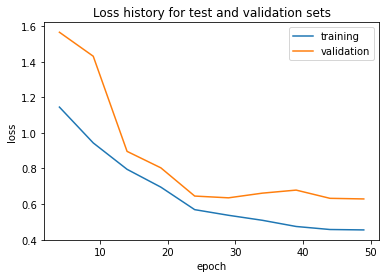

In [23]:
plt.plot( val_epoch_history, train_loss_history, label='training' )
plt.plot( val_epoch_history, val_loss_history, label='validation' )
plt.title( 'Loss history for test and validation sets' )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.legend()
plt.show()

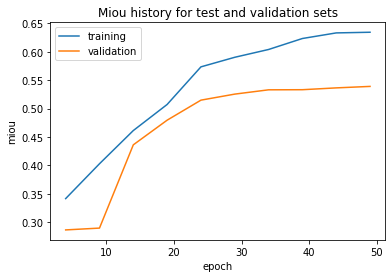

In [24]:
plt.plot( val_epoch_history, train_miou_history, label='training' )
plt.plot( val_epoch_history, val_miou_history, label='validation' )
plt.title( 'Miou history for test and validation sets' )
plt.xlabel( 'epoch' )
plt.ylabel( 'miou' )
plt.legend()
plt.show()

---

**Answer:**

Since the curves of the mIoU are similar to that of the loss but in reverse, we will only describe the evolution of the loss.

As usual, the validation loss is always greater than the training loss because the validation dataset has never been seen by the network before, so it is more likely to mispredict images from this dataset. Moreover, it steadily decreases over time up to 25 iterations, where its evolution is much slower. This is probably because the network has been trained "enough" on the dataset and cannot learn as much from it as before.

---


**Q10/ what should we have done to avoid overfitting?**

**please describe the curbs**


**Q10 bis/ please evaluate the model on the test set**



In [25]:
# Write the test code and evaluate the results.

In [26]:
loss, (iou, miou) = test( model, test_loader, criterion, metric )
print( 'TEST RESULTS : \nAverage loss : {} \nAverage mIoU : {} '.format( loss, miou ) )
for c, c_iou in zip( class_encoding.keys(), iou ):
  print( '{} : {}'.format( c, c_iou ) )

TEST RESULTS : 
Average loss : 0.9897767802079519 
Average mIoU : 0.45501378216502303 
sky : 0.8626550899011831
building : 0.6358117514397793
pole : 0.049183228779215014
road_marking : 0.8741942880600462
road : 0.6699876573099485
pavement : 0.6857236804538119
tree : 0.09433868456051693
sign_symbol : 0.21459606721153493
fence : 0.6786044033690085
car : 0.18508643220688706
pedestrian : 0.2697259018308362
bicyclist : 0.24025820085750862
unlabeled : nan


## B. Uncertainty evaluations with MCP
Here you will just use as confidence score the Maximum class probability (MCP)


**Q11/ please write a script to extract the Maximum class probability of one batch of images?**
please call this output confidence!

In [27]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = next( iter( test_loader ) )
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  outputs = model( batch_images )
  confidence, pred = torch.max( outputs, 1 )


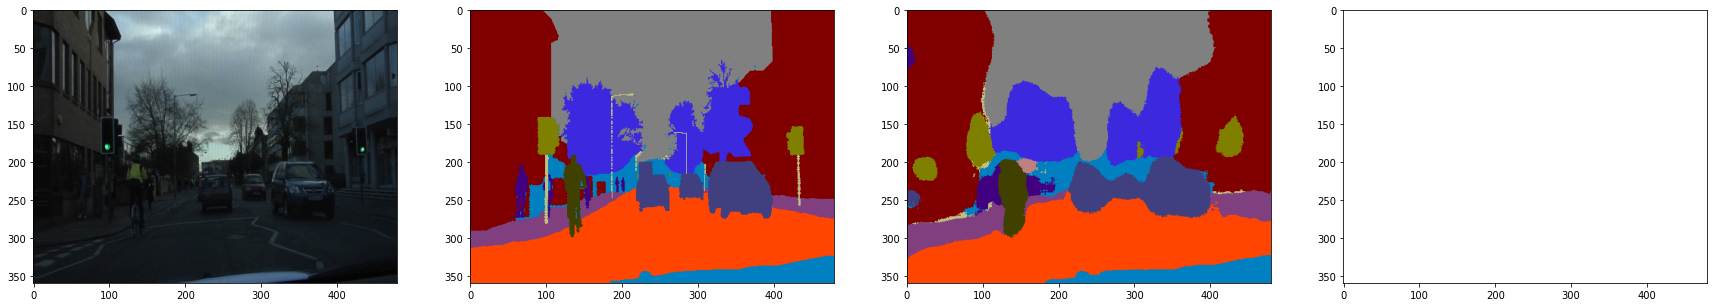

In [28]:
img_id = 0
label_to_rgb = transforms.Compose( [LongTensorToRGBPIL( class_encoding ), \
                                    transforms.ToTensor()] )
color_predictions = batch_transform( pred.cpu(), label_to_rgb )
color_batch_labels = batch_transform( batch_labels.cpu(), label_to_rgb )
image = torchvision.utils.make_grid( batch_images[img_id].cpu() ).numpy()
label = torchvision.utils.make_grid( color_batch_labels[img_id] ).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()


**Q12/ The last image is related to the confidence score of the DNN. Can you explain why?**
**Are you happy with this image?**

# IV. Training a U-NET for semantic segmentation




---



---

The U-net is a convolutional network architecture for fast and precise segmentation of images.

I propose you use the *inconv* *down* and *up* layers to implement a U-net.

down is downscale layer
up is upscale layer

I divided by 2 all the number of channels. Here is the description of the architecture :

1.   at the begining you should apply a inconv with 32 output channels
2.   then you apply down with 64 output channels
3.   then you apply down with 128 output channels
4.   then you apply down with 256 output channels
5.   then you apply down with 256 output channels
6.   then you apply up with 128 output channels
7.   then you apply up with 64 output channels
8.   then you apply up with 32 output channels
9.   then you apply up with num classes output channels

*(don't hesitate so check on internet)*


 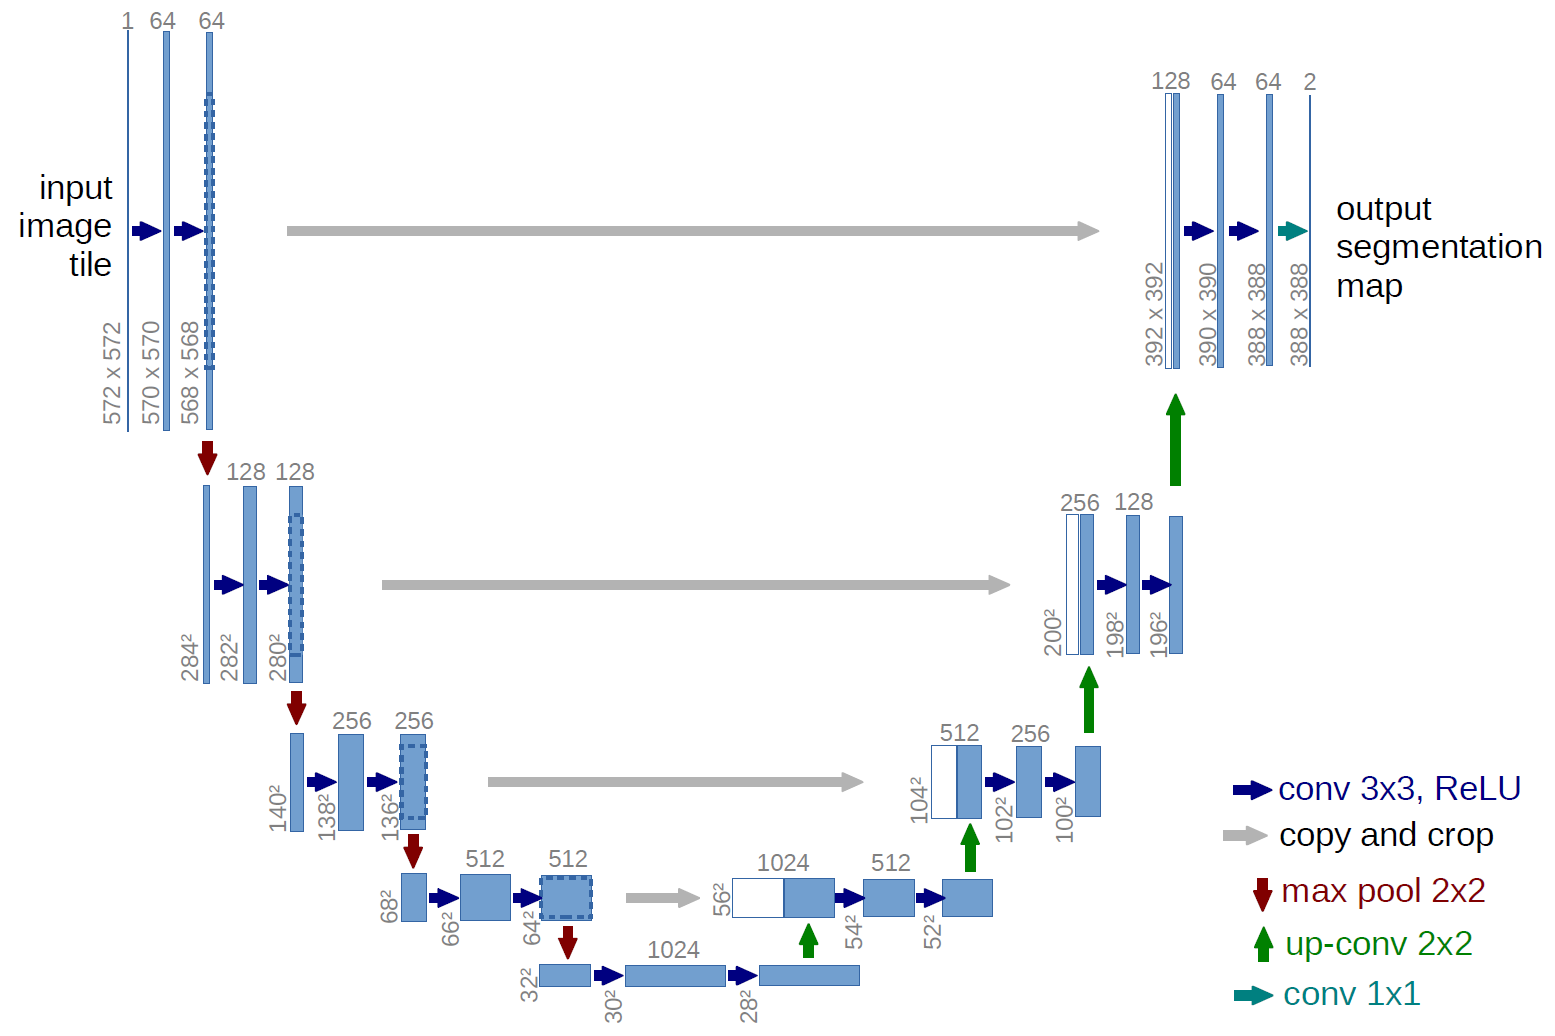

In [29]:

__all__ = ["UNet"]


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        self.bilinear = bilinear

        self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        if self.bilinear:
            x1 = F.interpolate(x1, scale_factor=2, mode='bilinear', align_corners=True)
        else:
            x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # for padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

#please note that we have added dropout layer to be abble to use MC dropout

class UNet(nn.Module):
    def __init__(self, classes):
        super(UNet, self).__init__()
        self.inc = inconv(3, 32)


    def forward(self, x):
        x1 = self.inc(x)
        # please complete


        return x

**Q13/ perform a training of this U-net**

In [30]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()

# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                     lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
  print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
  epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric) 
  lr_updater.step()
  print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print(">>>> [Epoch: {0:d}] Validation".format(epoch))
    loss, (iou, miou) = test(model, val_loader, criterion, metric)
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
    train_loss_history.append(train_loss)
    val_loss_history.append(loss)
    train_miou_history.append(train_miou)
    val_miou_history.append(miou)
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip(class_encoding.keys(), iou):
        print("{0}: {1:.4f}".format(key, class_iou))
        # Save the model if it's the best thus far
        '''if miou > best_miou:
          print("\nBest model thus far. Saving...\n")
          best_miou = miou
          utils.save_checkpoint(model, optimizer, epoch + 1, best_miou,
                                      args)'''


Training...

>>>> [Epoch: 0] Training


RuntimeError: ignored

**Q14/ please perform the eveluation and compare to FCN**

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

# V. Analysis and conclusions

---



---

**Q15/ Write a conclusions**